In [1]:
import os   #linar regression for binary classes
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits
import xgboost as xgb

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [3]:
digits = load_digits()

print(digits.keys())

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   stratify = digits.target,
                                                   random_state = RANDOM_STATE)
X_train.shape

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


(1347, 64)

In [4]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

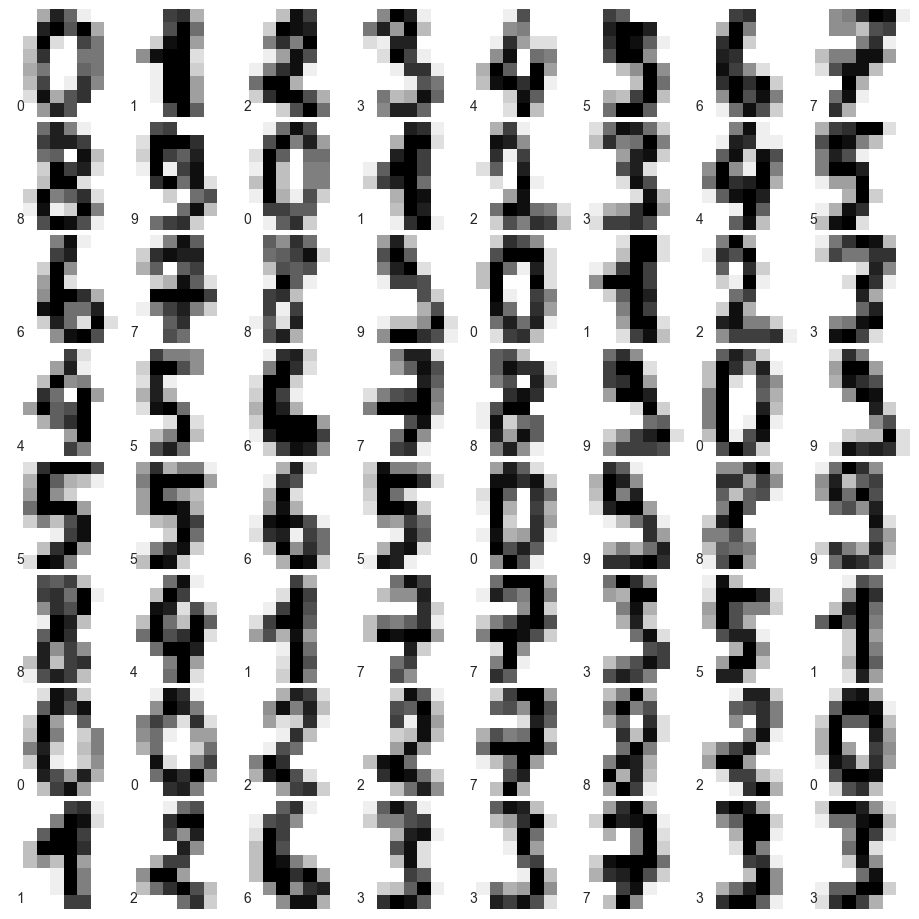

In [5]:
fig = plt.figure(figsize = (9,9))

fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# Plot the digits: each image in 8x8 pixels
for i in range(64):
    
    ax = fig.add_subplot(8,8, i + 1, xticks = [], yticks = [])
    
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    # label the imag with the target
    
    ax.text(0,7, str(digits.target[i]))

In [6]:
clf = xgb.XGBClassifier(tree_method = "hist",
                       random_state = RANDOM_STATE)
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=24, ...)

In [7]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred): 7.5f}')

Accuracy:  0.95333


In [8]:
xg_clf = xgb.XGBClassifier(tree_method = "hist",
                       random_state = RANDOM_STATE,
                       verbosity = 1)

params = {
    'n_estimators': [100, 500, 1000],       # how many trees
    'max_depth': [3,5,10,15,20],            # how deep
    'subsample': np.arange(0.5, 1.0, 0.1),      # how many subsamples
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'learning_rate': [0.001, 0.01, 0.1, 0.2]       # what is your learning rate
}

clf = RandomizedSearchCV(estimator=xg_clf,
                        param_distributions = params,
                        scoring = 'accuracy',
                        n_iter = 25,
                        verbose = 1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

print("Best Accuracy:", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7}
Best Accuracy: 0.9732727523062096


In [11]:
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9688888888888889